## 영상 밝기 조절
### 화소 처리 기법 (point processing)
dst(x,y) = f(src(x,y))
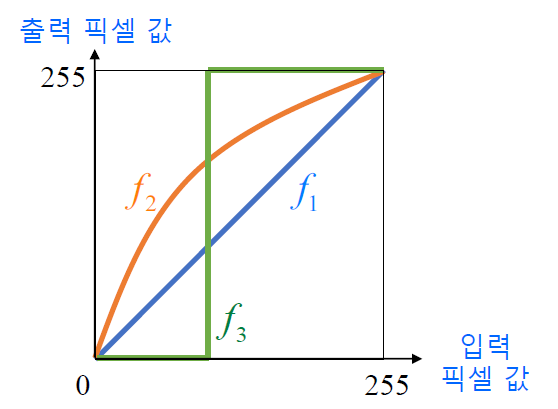

**```cv2.add(src1,src2,dst=None,mask=None,dtype=None) -> dst ```**
 - src1,src2 : 첫번째영상(또는스칼라) ,두번째영상(또는스칼라)
 - dst : 덧셈 연산 결과영상
 - mask : 마스크영상

In [ ]:
import sys ,cv2
import numpy as np 

src = cv2.imread(".\\ch03\\lenna.bmp",cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src,100)
dst2 = src+100 

if src is None:
    print("loadError")
    sys.exit()
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2) # >>> 출력 결과가 dst와 같지 않다. saturation 에서 255가 넘어가면 0으로 처리
cv2.waitKey()


In [ ]:
src = cv2.imread(".\\ch03\\lenna.bmp")
dst = cv2.add(src,(100,100,100,0))
dst2 = cv2.add(src,100)

if src is None:
    print("loadError")
    sys.exit()
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2) # >>> 출력 결과가 dst와 같지 않다. blue에 해당하는 채널만 100만큼 밝아짐 (튜플의 계산차)
cv2.waitKey()

## 영상의 산술연산
**```dst=saturation(src1(x,y)+src2(x,y)```**


### 가중치 합 
 - **```dst=saturation(a*src1(x,y)+b*src2(x,y)```** , a+b = 1
 - 두입력 영상의 평균 밝기를 유지

**```cv2.addWeighted(src1,alpha,src2,beta,gamma,dst=None,dtype=None) -> dst```**
 - gamma : 결과영상에 추가적으로 더할 값 
 
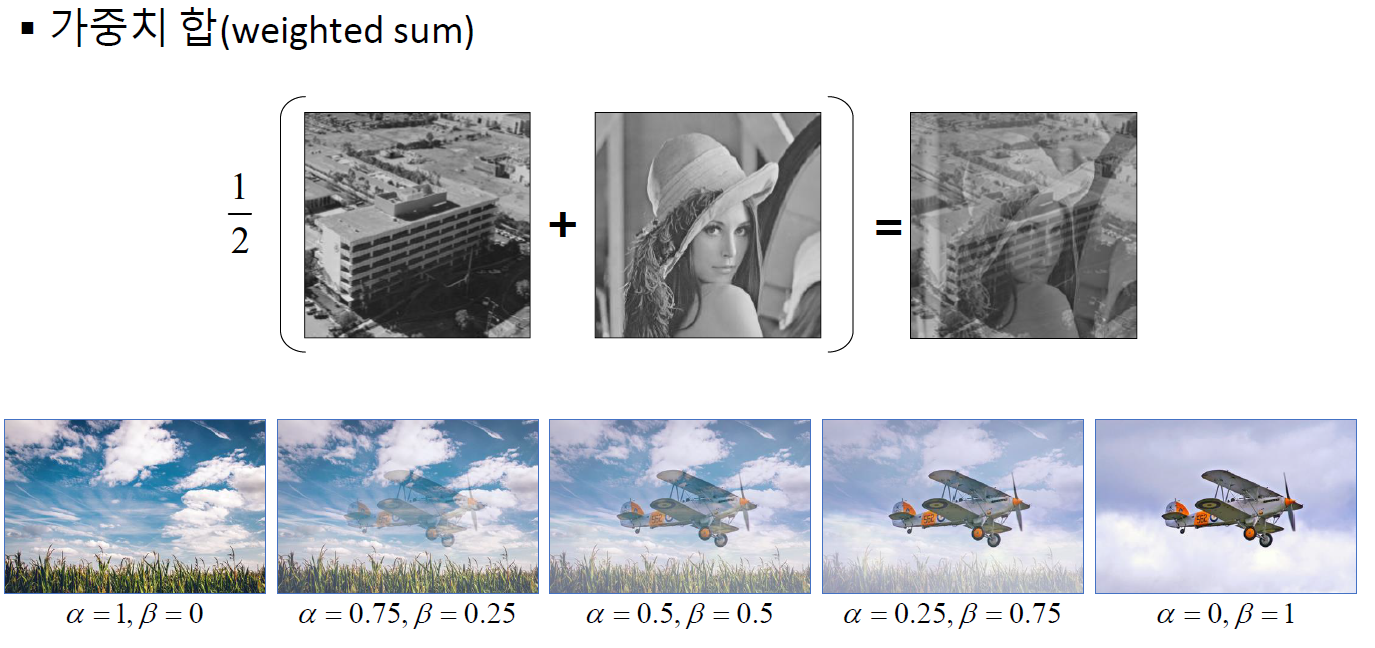

### 뺄셈연산
**```dst=saturation(src1(x,y)-src2(x,y)```**

**```cv2.subtract(src1,src2,dst=None,mask=None,dtype=None) -> dst```**

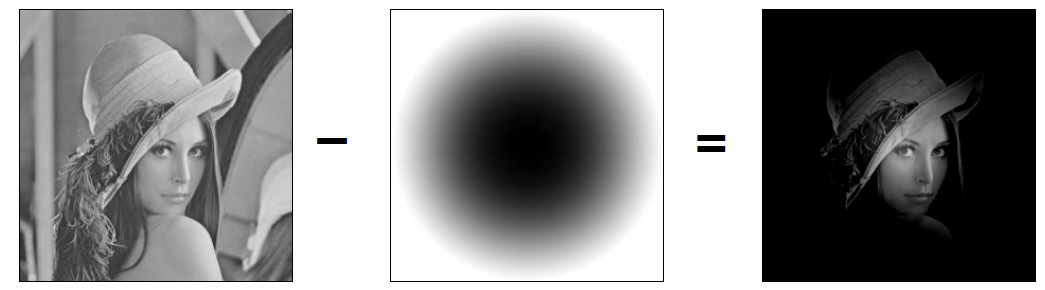

### 차이연산
**```dst=|src1(x,y)-src2(x,y)|```**
 - 두 영상의 같은 위치에 존재하는 픽셀값에 대해 뺄셈연산 
 - 두 영상에서 변화되는 부분만 뽑아낼 수 있다
 
**```cv2.absdiff(src1,src2,dst=None) -> dst```**

In [ ]:
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt 

src1 = cv2.imread(".\\ch03\\lenna256.bmp",cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread(".\\ch03\\square.bmp",cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print("Load error")
    sys.exit()

dst1 = cv2.add(src1,src2,dtype= cv2.CV_8U)
dst2 = cv2.addWeighted(src1,0.5,src2,0.5,0.0)
dst3 = cv2.subtract(src1,src2)
dst4 = cv2.absdiff(src1,src2)

plt.subplot(231),plt.axis('off'),plt.imshow(src1,'gray'),plt.title('src1')
plt.subplot(232),plt.axis('off'),plt.imshow(src2,'gray'),plt.title('src2')
plt.subplot(233),plt.axis('off'),plt.imshow(dst1,'gray'),plt.title('add')
plt.subplot(234),plt.axis('off'),plt.imshow(dst2,'gray'),plt.title('addweight')
plt.subplot(235),plt.axis('off'),plt.imshow(dst3,'gray'),plt.title('subtract')
plt.subplot(236),plt.axis('off'),plt.imshow(dst4,'gray'),plt.title('adsdiff')
plt.show()

## color 영상 , 색공간
 - numpy.ndarray , shape(h,w,3) , BRG 순서
 
 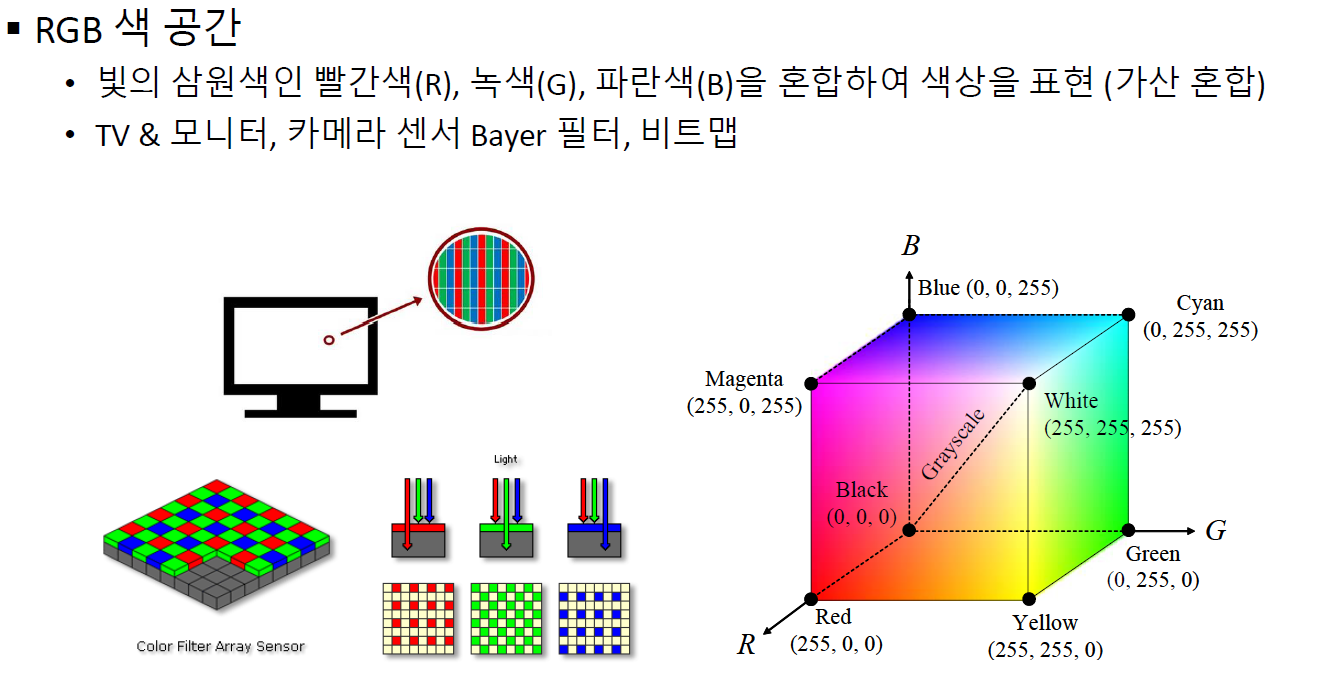
 

cv2.split(m,mv=None)-> dst
 - m: BGR로 구성된 컬러영상
 - mv : 출력 영상 
 - dst : 출력영상 리스트
 
cv2.merge(mv,dst=None) ->dst
 - mv: 입력영상 리스트 또는 튜플
 - dst : 출력 영상

In [ ]:
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 16), dpi=80)

src = cv2.imread(".\\ch03\\candies.png",cv2.IMREAD_COLOR)

if src1 is None or src2 is None:
    print("Load error")
    sys.exit()
print(f"src shape:{src.shape},src dtype :{src.dtype}")

planes = cv2.split(src)

# cv2.imshow("src",src)
# cv2.imshow("planes[0]_blue:",planes[0])
# cv2.imshow("planes[1]_green",planes[1])
# cv2.imshow("planes[2]_red",planes[2])

plt.subplot(241),plt.axis('off'),plt.imshow(src1,'gray'),plt.title('src1')
plt.subplot(242),plt.axis('off'),plt.imshow(planes[0],'gray'),plt.title('planes[0]_blue')
plt.subplot(243),plt.axis('off'),plt.imshow(planes[1],'gray'),plt.title('planes[1]_green')
plt.subplot(244),plt.axis('off'),plt.imshow(planes[2],'gray'),plt.title('planes[2]_red')

cv2.waitKey()
cv2.destroyAllWindows()

### 색공간 변환 함수
```cv2.cvtColor(src,code,dst=None,dstCn=None) -> dst```
 - src :입력영상
 - code : 변환 코드
   - cv2.COLOR_BGR2GRAY , cv2.COLOR_BGR2RGB , cv2.COLOR_BGR2HSV , cv2.COLOR_BGR2YCrCb ... 
 - dstCn : 결과 영상의 채널수 , 0이면 자동 결정 

#### GRAYSCALE
``` y= 0.299R+0.587G+0.114B``` 
- 약 3:6:1의 비율로 생성
- 저장용량 감소, 처리속도 향상 / 색상정보 손실

#### HSV 
- Hue : 색상, 색의 종류 
- Saturation : 채도 ,탁하고 선명한 정도 
- Value : 명도 밝기 
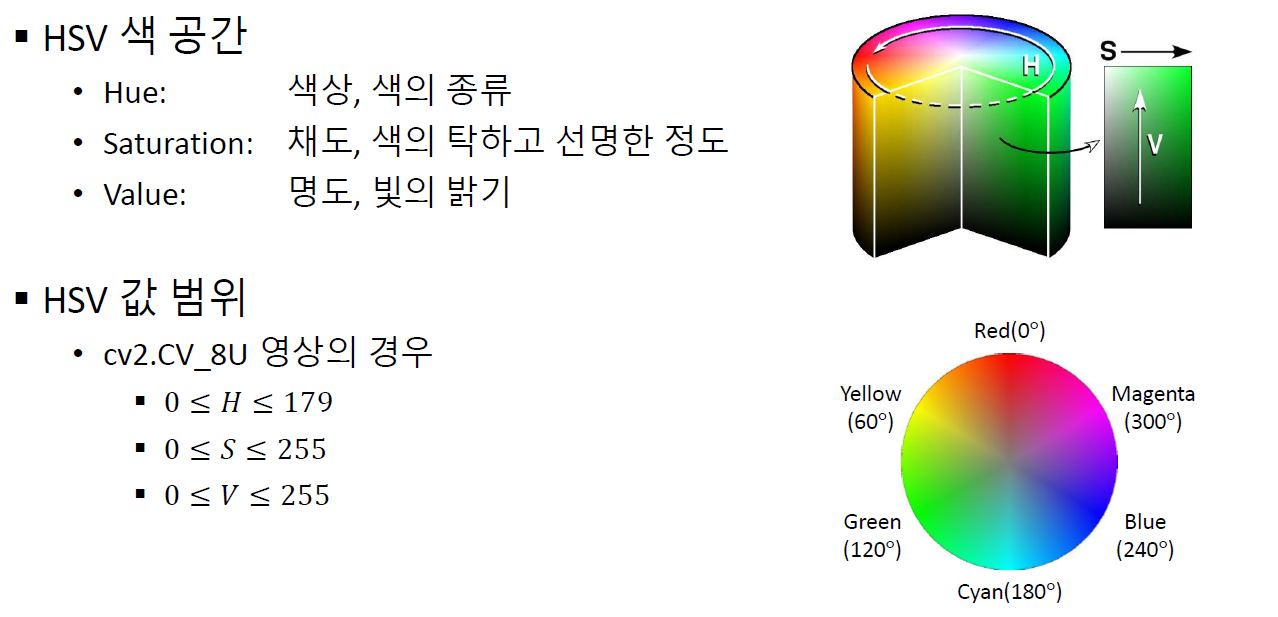

#### YCrCb 
- PAL,NTSC,SECAM등 컬러 비디오 표준에 사용되는 공간
- Y :밝기정보 (luma)
- Cr,Cb : 색차(chroma)
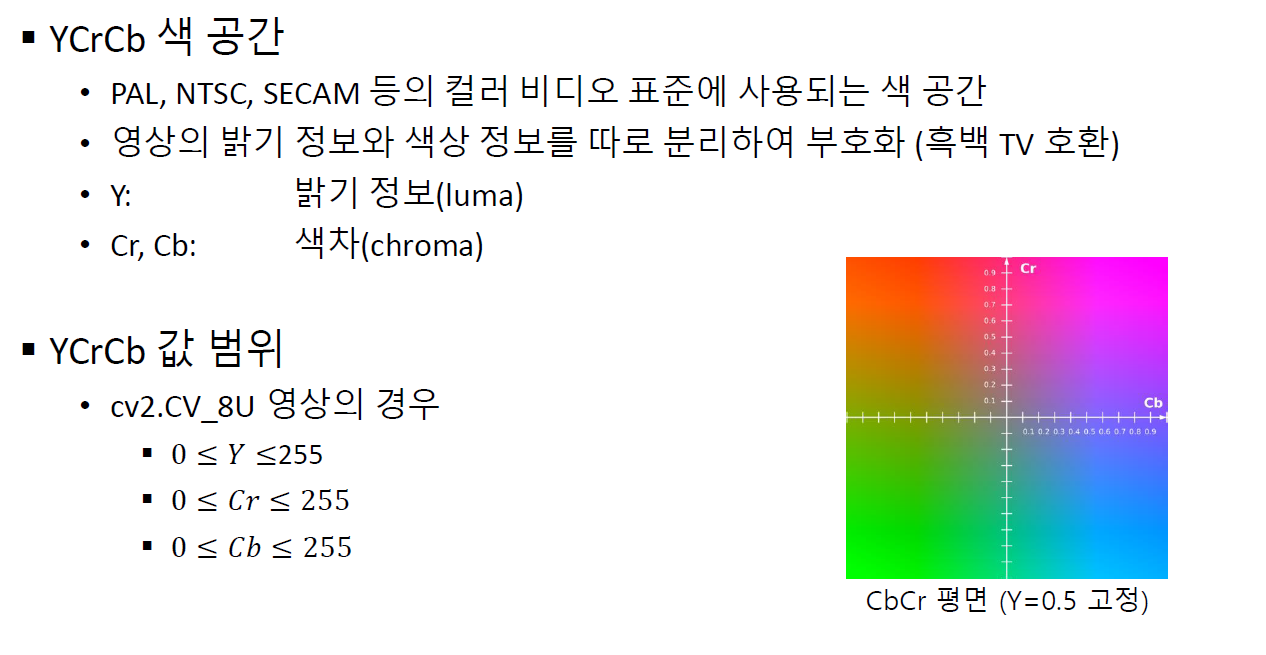

### Histogram
h(g) = N_g
영상의 필셀 값 분포를 그래프 형태로 표현한 것 

- Normalized Histogram

**```cv2.calcHist(images, channels, mask, histsize, range, hist= None,accumulate=None)-> hist
 - images : 입력 영상 리스트 , 하나여도 리스트로 변환해서 전달 
 - channel : hist를 구할 채널 , [0,1] , [2] ... 
 - mask : 마스크영상 , 입력영상 전체에서 구하려면 mask = None
 - histsize : 각 차원의 크기(bin의 개수)를 나타내는 리스트
 - ranges: 각 차원의 최솟값과 최댓값으로 구성된 리스트 
 - accumulation : 기존 hist에 누적(true) or 새로 만들기 (false)
 - hist : 계산된 히스토그램 

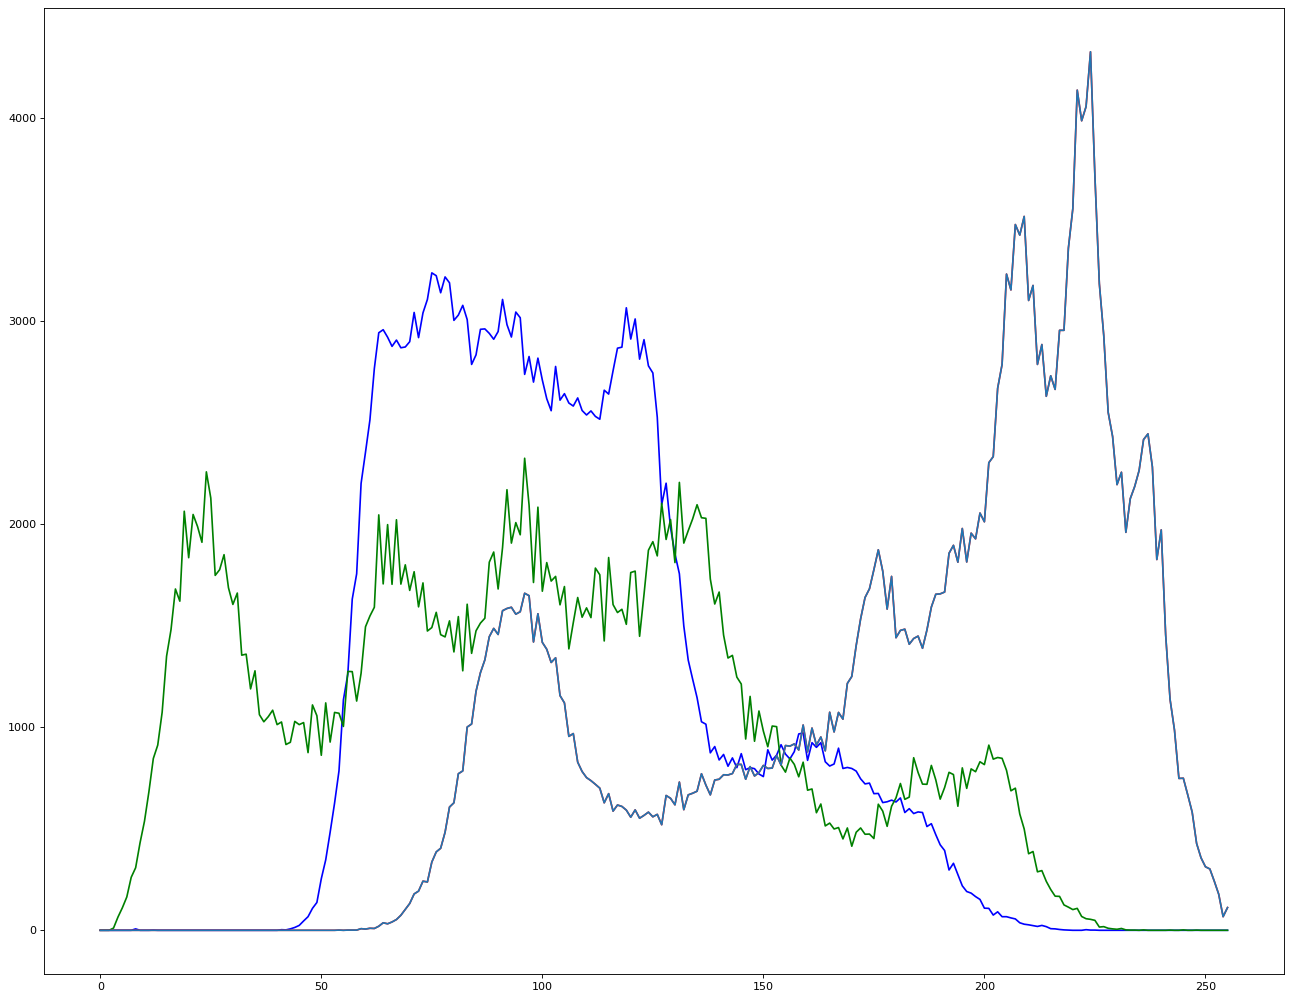

In [2]:
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 16), dpi=80)

src = cv2.imread(".\\ch03\\lenna.bmp",cv2.IMREAD_COLOR)
if src is None:
    print("Load error")
    sys.exit()

colors = ['blue','green','red']
bgr_planes = cv2.split(src)

for (p,c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p],[0],None,[256],[0,256])
    plt.plot(hist,color=c)
    
cv2.imshow("src",src)
cv2.waitKey(3)
cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist


src = cv2.imread('.\\ch03\\lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()


### 명암비 조절 (contrast) 
 - 밝은곳과 어두운 곳 사이에 드러나는 발기 정도의 차이
 - ```dst(x,y) = saturate(s*src(x,y))```
   - 1이하일때 어두워지고 1이상이면 밝아지는 단점 
 - ```dst(x,y) = saturate(src(x,y)+(src(x,y)-128)*a)``` 

In [7]:
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 16), dpi=80)

src = cv2.imread(".\\ch03\\lenna.bmp",cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Load error")
    sys.exit()
    
alpha = 1.0 
dst = np.clip((1+alpha)*src-128*alpha,0,255).astype(np.uint8)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1600x1280 with 0 Axes>

### 자동 명암비 조절 - 1. Histogram Strachig
 - 영상의 스케일이 전 구간에 걸쳐 나타나도록 변환
 - **```cv2.normalize(src,dst,alpha=None,beta=None,norm_type=None,dtype=None,mask=None)->dst```**
   - alpha : 최솟값 (0) 
   - beta : 최댓값(255)
   - norm_type : 정규화 타입 -> NORM_INF, NORM_L1, NORM_L2 , NORM_MINMAX
   - dtype: 결과 영상의 타입
   - mask : 마스크 영상

### 자동 명암비 조절 - 2. Histogram Equalization
 - 히스토그램이그레이스케일 전구간에서 균일한 분포로 나타나도록 변경하는 명암비 향상 기법
 - cdf를 이용해서
 
**```cv2.equalizeHist(src,dst=None) -> dst```**

 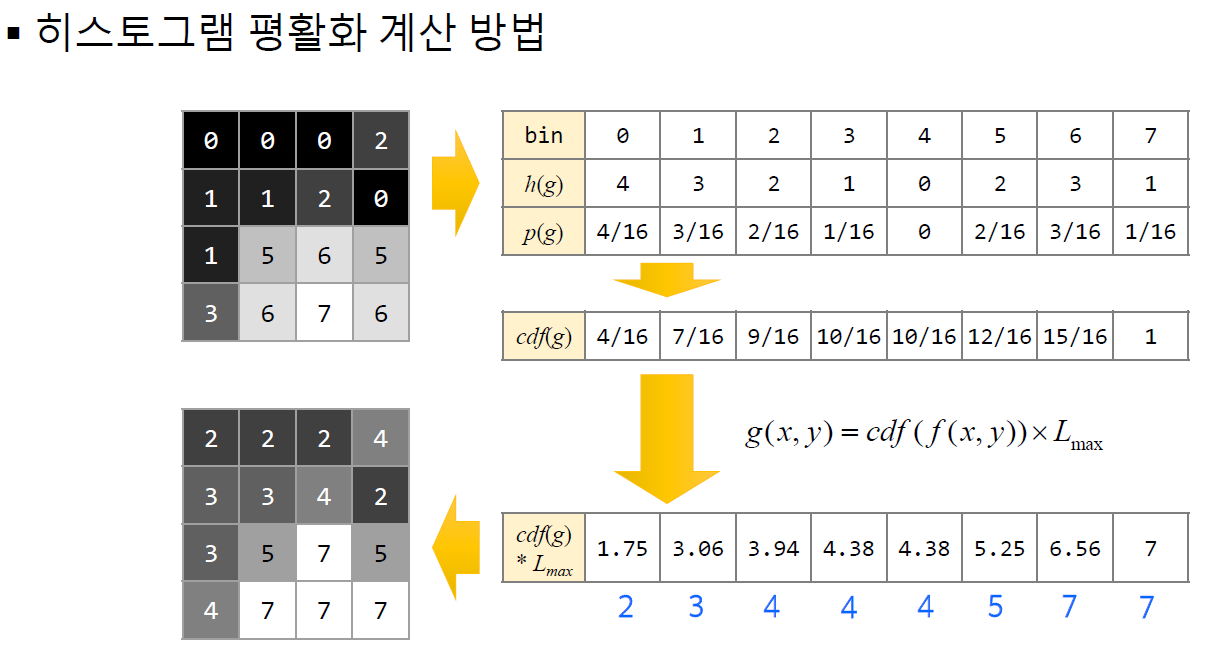

In [17]:
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 16), dpi=80)

src = cv2.imread(".\\ch03\\Hawkes.jpg",cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Load error")
    sys.exit()
    
dst = cv2.normalize(src,None,0,255,cv2.NORM_MINMAX)
'''11의행은 아래 numpy 함수를 이용해 13-15의 행처럼 작성 할 수 있다.
gmin = np.min(src)
gmax = np.max(src)
dst2= np.clip((src-gmin)*255./(gmax-gmin),0,255).astype(np.uint8)
'''
dst3 = cv2.equalizeHist(src)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst3',dst3)
cv2.waitKey()
cv2.destroyAllWindows()

histSrc = cv2.calcHist([src], [0], None, [256], [0, 256])
histSrc_img = getGrayHistImage(histSrc)
histDst = cv2.calcHist([dst], [0], None, [256], [0, 256])
histDst_img = getGrayHistImage(histDst)
histDst3 = cv2.calcHist([dst3], [0], None, [256], [0, 256])
histDst3_img = getGrayHistImage(histDst3)


cv2.imshow('src', histSrc_img)
cv2.imshow('hist_straching', histDst_img)
cv2.imshow('hist_equalize', histDst3_img)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1600x1280 with 0 Axes>

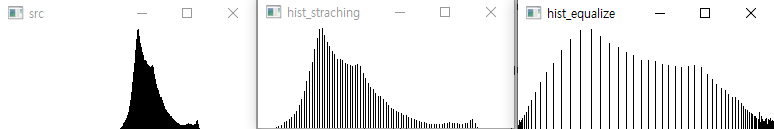
- equalize는 bin이 높은 곳은 넓게 straching , 낮은곳은 좁게 straching 


In [28]:
''' color 영상의 equalize 는 YCrCb에서 명암을 나타내는 Y plane만 추출해서 equal후 merge 한다'''
import sys, cv2
import numpy as np 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 16), dpi=80)

src = cv2.imread(".\\ch03\\field.bmp",cv2.IMREAD_COLOR)
if src is None:
    print("Load error")
    sys.exit()

src_ycrcb = cv2.cvtColor(src,cv2.COLOR_BGR2YCrCb)
planes = list(cv2.split(src_ycrcb))
planes[0] = cv2.equalizeHist(planes[0])
dst_ycrcb = cv2.merge(planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

histSrc = cv2.calcHist([src], [0], None, [256], [0, 256])
histSrc_img = getGrayHistImage(histSrc)
histDst = cv2.calcHist([dst], [0], None, [256], [0, 256])
histDst_img = getGrayHistImage(histDst)

cv2.imshow('src', histSrc_img)
cv2.imshow('hist_equalize', histDst_img)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1600x1280 with 0 Axes>

### 특정 생상 영역 추출 
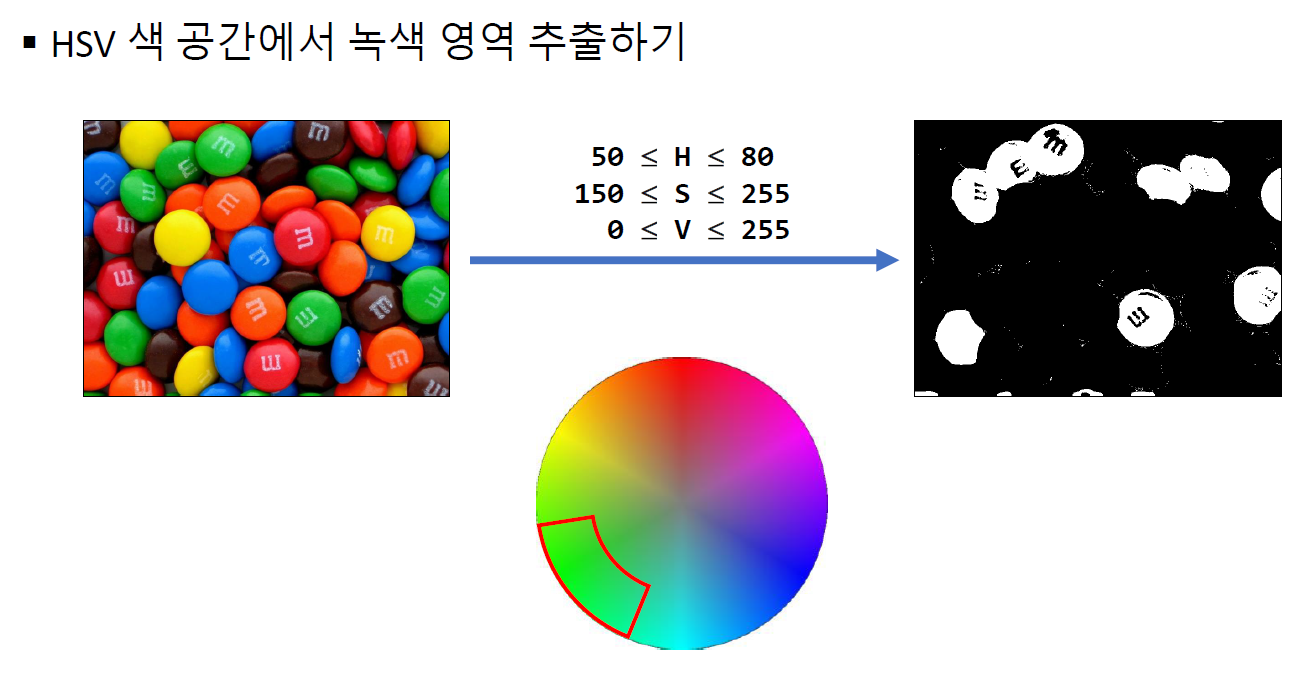
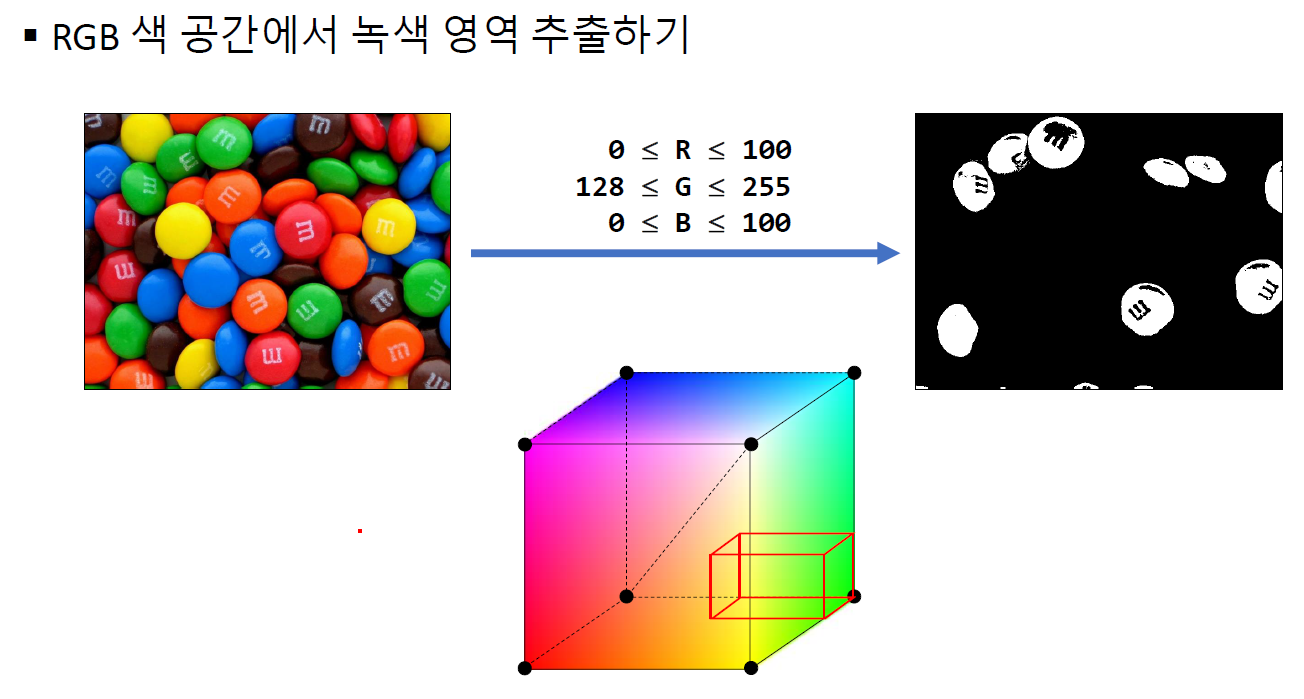

In [32]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch03\\candies2.png') # 정상 
#src = cv2.imread('candies2.png') # 어두운 

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst_BGR = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
dst_HSV = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst_BGR', dst_BGR)
cv2.imshow('dst_HSV', dst_HSV)
cv2.waitKey()

cv2.destroyAllWindows()


In [34]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch03\\candies.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
'''빨간색 추출의 경우 0-13 , 160-175 의 hue값을 각각 추출해서 or 연산이 필요'''
def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


### Histogram Backprojection
- 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지 검사
- 임의의 색상 영역 검출에 효과적 
**```cv2.calcBackProject(images, channels, hist, ranges, scale,dst=None) -> dst```**
 - images : 입력영상리스트 (하나여도 리스트로 전달)
 - channel : 역투영 계산에 사용할 채널 번호 리스트
 - hist : 입력 히스토그램 
 - range: 히스토그램 각차원의 최솟값과 최댓값으로 구성된 리스트 
 - scale: 출력 역투영 행렬에 추가적으로 곱할 값 
 - dst : 출력 역투영 영상

In [35]:
import sys
import numpy as np
import cv2


# 입력 영상에서 ROI를 지정하고, 히스토그램 계산

src = cv2.imread('.\\ch03\\cropland.png')

if src is None:
    print('Image load failed!')
    sys.exit()

x, y, w, h = cv2.selectROI(src)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w] # 사용자가 선택한 사각형 영역 영상

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [38]:
import sys
import numpy as np
import cv2


# CrCb 살색 히스토그램 구하기
ref = cv2.imread('.\\ch03\\kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread('.\\ch03\\kids1_mask.bmp', cv2.IMREAD_GRAYSCALE)

if ref is None or mask is None:
    print('Image load failed!')
    sys.exit()

ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
ranges = [0, 256, 0, 256]
hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, 
                          cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상에 히스토그램 역투영 적용
src = cv2.imread('kids2.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()


Image load failed!


SystemExit: 

## 실전코딩 - 크로마 키 합성
 - 녹색 또는 파란색 배경에 촬영한 다른 영상 합성하기 
 - 크로마키 영상을 HSV 색 공간으로 변환 

```cv2.inRange()``` 함수사용 (녹색 영역 검출)
   - 50 <_ H <_ 80
   - 150 <_ S <_ 255
   - 0 <_ V <_ 255 
   
``` cv2.copyTo()``` 함수사용 

In [42]:
import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture('.\\ch03\\woman.mp4')
cap1 = cv2.VideoCapture(0)


if not cap1.isOpened():
    print('video open failed!')
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture('.\\ch03\\raining.mp4')

if not cap2.isOpened():
    print('video open failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break
    
    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break
        
        '''두 영상의 크기가 다를 경우 resize 필요'''
        frame2 = cv2.resize(frame2,(w,h))

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    cv2.imshow('frame', frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()


frame_cnt1: -1
frame_cnt2: 353


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\core\src\copy.cpp:442: error: (-215:Assertion failed) size() == mask.size() in function 'cv::Mat::copyTo'
